## Sabrina Ruiz
# Book Recommender System
## *Exploratory Data Analysis*

In [4]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re

In [ ]:
# setting a color palette for Seaborn visualizations
bright_palette = sns.set_palette(palette = "bright")

#other visual standards
plt.rcParams['figure.figsize'] = (20, 10)


In [6]:
# GOOGLE COLAB IMPORT METHOD
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

KeyboardInterrupt: 

In [14]:
# insert large files directly from google drive
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [15]:
#import os
#path="/content/drive/My Drive/"
#os.chdir(path)
#os.listdir(path)


['Powerpoints',
 'Speech Files',
 'English Teaching Stuff',
 'Receipts , pics, stuff',
 'Stuff we can do @ BOE.gdoc',
 'Job Search',
 'Post-Japan.gdoc',
 'Singapore flight receipt etc.pdf',
 'for liz pix.pdf',
 'self-intro寺田南一年.gslides',
 'Leaving Japan To Do List.gdoc',
 'Sabrina Ruiz.gdoc',
 'Baby Class.gdoc',
 'eStmt_2021-07-20.pdf',
 'Ruiz Entertainment Room.gslides',
 'Home Alone.gdoc',
 '2021 Downey Porto Saturday Donations.gsheet',
 'Proof of friendship w liz.gdoc',
 'Liz stuff to print.gdoc',
 'invitationletterE2022.pdf',
 'Side Projects',
 'Naho in LA Planner.gsheet',
 'Things to do with Naho 🇺🇸.gdoc',
 'Heartland 1098.pdf',
 'Spring break 2023.gdoc',
 'WSAS 2022 final loan statement.pdf',
 'Brain Station App.gdoc',
 'Business report.gdoc',
 'Visualization files.gsheet',
 'Untitled document (3).gdoc',
 'General_Online_BrainStationPolicyHandbook.pdf',
 'Data Science Bootcamp Enrollment Agreement.pdf',
 'Computer Files',
 'IMG_3858.HEIC',
 'sakila.zip (Unzipped Files)',
 'SQL No

In [21]:
books_rating_raw = pd.read_csv('/content/drive/My Drive/books_rating.csv')

In [22]:
books_rating_raw.head(2)

,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
0,1882931173,Its Only Art If Its Well Hung!,NaN,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",7/7,4.0,940636800,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...
1,0826414346,Dr. Seuss: American Icon,NaN,A30TK6U7DNS82R,Kevin Killian,10/10,5.0,1095724800,Really Enjoyed It,I don't care much for Dr. Seuss but after read...


In [ ]:
# importing data file(s)

book_data_raw = pd.read_csv('books_data.csv') #book info:title, author, genre, etc
# = pd.read_csv('books_rating.csv')
#as of 10.10.23
# changed to Amazon dataset found at this link: https://www.kaggle.com/datasets/mohamedbakhet/amazon-books-reviews?select=Books_rating.csv


# Table of Content
   1. [Part 1](#Part-1-Basic-Data-Wrangling)  Basic Data Wrangling
    
   2. [Part 2](#Part-2-Basic-EDA)  Basic EDA
    
   3. [Part 3](#-Part-3-Advanced-EDA)  Part 3 Advanced EDA

# Part 1 Basic Data Wrangling

### First Dataset: "Book Data"

In [ ]:
print("The shape of 'book data':",book_data_raw.shape)

The shape of 'book data': (212404, 10)


In [ ]:
book_data_raw.dtypes

Title             object
description       object
authors           object
image             object
previewLink       object
publisher         object
publishedDate     object
infoLink          object
categories        object
ratingsCount     float64
dtype: object

At a glance, `publishedDate` seems to be the only feature with a mismatched datatype.

In [ ]:
book_data_raw.head(3)

,Title,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount
0,Its Only Art If Its Well Hung!,NaN,['Julie Strain'],http://books.google.com/books/content?id=DykPA...,http://books.google.nl/books?id=DykPAAAACAAJ&d...,NaN,1996,http://books.google.nl/books?id=DykPAAAACAAJ&d...,['Comics & Graphic Novels'],NaN
1,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN
2,Wonderful Worship in Smaller Churches,This resource includes twelve principles in un...,['David R. Ray'],http://books.google.com/books/content?id=2tsDA...,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,NaN,2000,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,['Religion'],NaN


Now I will drop some unecessary columns for the following reasons:
- `image` I do not plan to create an image-based system
- `previewLink` book names are enough
- `infoLink` another weblink that won't be used
- `publisher` I don't plan to use publisher-specific breakdowns
- `description` for the purposes of this project, I will use the written review for text analysis. As such, the book `description` will not be needed. I would like to explore the possibility of creating a more sophisticated recommender system including this feature in the future.

In [ ]:
book_data_df = book_data_raw.drop(['image', 'previewLink', 'infoLink','publisher','description' ], axis=1)
book_data_df # original file - redundant columns

,Title,authors,publishedDate,categories,ratingsCount
0,Its Only Art If Its Well Hung!,['Julie Strain'],1996,['Comics & Graphic Novels'],NaN
1,Dr. Seuss: American Icon,['Philip Nel'],2005-01-01,['Biography & Autobiography'],NaN
2,Wonderful Worship in Smaller Churches,['David R. Ray'],2000,['Religion'],NaN
3,Whispers of the Wicked Saints,['Veronica Haddon'],2005-02,['Fiction'],NaN
4,"Nation Dance: Religion, Identity and Cultural ...",['Edward Long'],2003-03-01,NaN,NaN
...,...,...,...,...,...
212399,The Orphan Of Ellis Island (Time Travel Advent...,['Elvira Woodruff'],2000-06-01,['Juvenile Fiction'],2.0
212400,Red Boots for Christmas,NaN,1995,['Juvenile Fiction'],NaN
212401,Mamaw,['Wild Wild Cabbage'],2018-01-17,NaN,NaN
212402,The Autograph Man,['Zadie Smith'],2003-08-12,['Fiction'],19.0


Moving on:

From the above, it seems that each `authors` and `categories` value is in a list format with the authors name surrounded by brackets. I don't see an obvious reason for this, so I will remove them.  

In [ ]:
book_data_df['authors'] = book_data_df['authors'].str.strip('[\'\']')
book_data_df['categories'] = book_data_df['categories'].str.strip('[\'\']')

book_data_df.head(1)

,Title,description,authors,publishedDate,categories,ratingsCount
0,Its Only Art If Its Well Hung!,NaN,Julie Strain,1996,['Comics & Graphic Novels'],NaN


Next, the `publishedDate` is inconsistent. I will limit all entries to just the year, as that is the only information on all entries.

In [ ]:
#WIP MIXED YYYY and YYYY-MM and YYYY-MM-DD format, but since I am not plannig to use this information
#I will move on and come back to this if it proves to be important
book_data_df['publishedDate'] = book_data_df['publishedDate'].str[:4]
book_data_df.head(3)
#book_data_raw['publishedDate'].str.findall('[0-9]{4}', book_data_raw['publishedDate'])

,Title,authors,publishedDate,categories,ratingsCount
0,Its Only Art If Its Well Hung!,['Julie Strain'],1996,['Comics & Graphic Novels'],NaN
1,Dr. Seuss: American Icon,['Philip Nel'],2005,['Biography & Autobiography'],NaN
2,Wonderful Worship in Smaller Churches,['David R. Ray'],2000,['Religion'],NaN


### Second Dataset: "Books Rating"

In [ ]:
print("The shape of 'book rating data':",books_rating_raw.shape)

NameError: name 'books_rating_raw' is not defined

This file is noticeably bigger than the previous one, with 3 million rows and 10 features.

In [ ]:
books_rating_raw.head(5)

,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
0,1882931173,Its Only Art If Its Well Hung!,NaN,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",7/7,4.0,940636800,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...
1,0826414346,Dr. Seuss: American Icon,NaN,A30TK6U7DNS82R,Kevin Killian,10/10,5.0,1095724800,Really Enjoyed It,I don't care much for Dr. Seuss but after read...
2,0826414346,Dr. Seuss: American Icon,NaN,A3UH4UZ4RSVO82,John Granger,10/11,5.0,1078790400,Essential for every personal and Public Library,"If people become the books they read and if ""t..."
3,0826414346,Dr. Seuss: American Icon,NaN,A2MVUWT453QH61,"Roy E. Perry ""amateur philosopher""",7/7,4.0,1090713600,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D..."
4,0826414346,Dr. Seuss: American Icon,NaN,A22X4XUPKF66MR,"D. H. Richards ""ninthwavestore""",3/3,4.0,1107993600,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...


In [ ]:
books_rating_raw.dtypes

Id                     object
Title                  object
Price                 float64
User_id                object
profileName            object
review/helpfulness     object
review/score          float64
review/time             int64
review/summary         object
review/text            object
dtype: object

Since this is the main dataframe for my project, I am hesitant to drop many columns from the beginning.  However, I will drop price and helpfulness as I see no need for that for this project.

In [ ]:
books_rating_df = books_rating_raw.drop(['Price','review/helpfulness','review/time'], axis=1)
books_rating_df.head()

,Id,Title,User_id,profileName,review/score,review/summary,review/text
0,1882931173,Its Only Art If Its Well Hung!,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",4.0,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...
1,0826414346,Dr. Seuss: American Icon,A30TK6U7DNS82R,Kevin Killian,5.0,Really Enjoyed It,I don't care much for Dr. Seuss but after read...
2,0826414346,Dr. Seuss: American Icon,A3UH4UZ4RSVO82,John Granger,5.0,Essential for every personal and Public Library,"If people become the books they read and if ""t..."
3,0826414346,Dr. Seuss: American Icon,A2MVUWT453QH61,"Roy E. Perry ""amateur philosopher""",4.0,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D..."
4,0826414346,Dr. Seuss: American Icon,A22X4XUPKF66MR,"D. H. Richards ""ninthwavestore""",4.0,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...


In [ ]:
books_rating_df.rename(columns = {'review/score':'review_score'}, inplace = True) #rename REVIEW SCORE
books_rating_df.rename(columns = {'review/summary':'review_summary'}, inplace = True) #rename REVIEW SUMMARY
books_rating_df.rename(columns = {'review/text':'review'}, inplace = True) #rename REVIEW TEXT


books_rating_df.head()

,Id,Title,User_id,profileName,review_score,review_summary,review
0,1882931173,Its Only Art If Its Well Hung!,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",4.0,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...
1,0826414346,Dr. Seuss: American Icon,A30TK6U7DNS82R,Kevin Killian,5.0,Really Enjoyed It,I don't care much for Dr. Seuss but after read...
2,0826414346,Dr. Seuss: American Icon,A3UH4UZ4RSVO82,John Granger,5.0,Essential for every personal and Public Library,"If people become the books they read and if ""t..."
3,0826414346,Dr. Seuss: American Icon,A2MVUWT453QH61,"Roy E. Perry ""amateur philosopher""",4.0,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D..."
4,0826414346,Dr. Seuss: American Icon,A22X4XUPKF66MR,"D. H. Richards ""ninthwavestore""",4.0,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...


### Merging the Two Dataframes

In [ ]:
books_rating_df.head(1)

,Id,Title,User_id,profileName,review_score,review_summary,review
0,1882931173,Its Only Art If Its Well Hung!,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",4.0,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...


In [ ]:
book_data_df.head(1)

,Title,description,authors,publishedDate,categories,ratingsCount
0,Its Only Art If Its Well Hung!,NaN,Julie Strain,1996,Comics & Graphic Novels,NaN


Seeing as both dataframes have the Title in common, that is how I will merge the two. First, I will fill in any missing title values to maintain as much volume as possible

In [ ]:
#checking for missing values, BOOK DATA
book_data_df.isna().sum(axis=0)

Title                 1
description       68442
authors           31413
publishedDate     25305
categories        41199
ratingsCount     162652
dtype: int64

In [ ]:
#finding that one missing Title
book_data_df[book_data_df['Title'].isnull()] # Nan Yar - Who Am I?

,Title,description,authors,publishedDate,categories,ratingsCount
1066,NaN,NaN,Maharshi Ramana,2015-12-15,NaN,1.0


In [ ]:
#does the author have another book?
book_data_df.loc[book_data_df['authors'] == 'Maharshi Ramana']

# the answer is no, so this is safe to drop.

,Title,description,authors,publishedDate,categories,ratingsCount
1066,NaN,NaN,Maharshi Ramana,2015-12-15,NaN,1.0


In [ ]:
#drop the one title missing
book_data_df.dropna(subset=['Title'], inplace=True)

In [ ]:
book_data_df.isna().sum(axis=0)

Title                 0
description       68441
authors           31413
publishedDate     25305
categories        41198
ratingsCount     162652
dtype: int64

In [ ]:
#checking for missing values, BOOKS REVIEW
books_rating_df.isna().sum(axis=0)


Id                     0
Title                208
User_id           561787
profileName       561886
review_score           0
review_summary        38
review                 8
dtype: int64

In [ ]:
#there are missing titles, but there is no id I can use to try and fill these in.
# Seeing it's small percentage, I will accept this loss
round(books_rating_df.isna().sum(axis=0)/books_rating_df.shape[0]*100,2)

Id                 0.00
Title              0.01
User_id           18.73
profileName       18.73
review_score       0.00
review_summary     0.00
review             0.00
dtype: float64

In [ ]:
merged_df = pd.merge(books_rating_df, book_data_df, on='Title', how='inner')

In [ ]:
merged_df.shape

(2999792, 12)

In [ ]:
merged_df

,Id,Title,User_id,profileName,review_score,review_summary,review,description,authors,publishedDate,categories,ratingsCount
0,1882931173,Its Only Art If Its Well Hung!,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",4.0,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...,NaN,Julie Strain,1996,Comics & Graphic Novels,NaN
1,0826414346,Dr. Seuss: American Icon,A30TK6U7DNS82R,Kevin Killian,5.0,Really Enjoyed It,I don't care much for Dr. Seuss but after read...,Philip Nel takes a fascinating look into the k...,Philip Nel,2005-01-01,Biography & Autobiography,NaN
2,0826414346,Dr. Seuss: American Icon,A3UH4UZ4RSVO82,John Granger,5.0,Essential for every personal and Public Library,"If people become the books they read and if ""t...",Philip Nel takes a fascinating look into the k...,Philip Nel,2005-01-01,Biography & Autobiography,NaN
3,0826414346,Dr. Seuss: American Icon,A2MVUWT453QH61,"Roy E. Perry ""amateur philosopher""",4.0,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D...",Philip Nel takes a fascinating look into the k...,Philip Nel,2005-01-01,Biography & Autobiography,NaN
4,0826414346,Dr. Seuss: American Icon,A22X4XUPKF66MR,"D. H. Richards ""ninthwavestore""",4.0,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...,Philip Nel takes a fascinating look into the k...,Philip Nel,2005-01-01,Biography & Autobiography,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2999787,B000NSLVCU,The Idea of History,NaN,NaN,4.0,Difficult,"This is an extremely difficult book to digest,...","Robin George Collingwood, FBA (1889 - 1943) wa...",R. G. Collingwood,2018-06-21,History,3.0
2999788,B000NSLVCU,The Idea of History,A1SMUB9ASL5L9Y,jafrank,4.0,Quite good and ahead of its time occasionally,This is pretty interesting. Collingwood seems ...,"Robin George Collingwood, FBA (1889 - 1943) wa...",R. G. Collingwood,2018-06-21,History,3.0
2999789,B000NSLVCU,The Idea of History,A2AQMEKZKK5EE4,"L. L. Poulos ""Muslim Mom""",4.0,Easier reads of those not well versed in histo...,"This is a good book but very esoteric. ""What i...","Robin George Collingwood, FBA (1889 - 1943) wa...",R. G. Collingwood,2018-06-21,History,3.0
2999790,B000NSLVCU,The Idea of History,A18SQGYBKS852K,"Julia A. Klein ""knitting rat""",5.0,"Yes, it is cheaper than the University Bookstore","My daughter, a freshman at Indiana University,...","Robin George Collingwood, FBA (1889 - 1943) wa...",R. G. Collingwood,2018-06-21,History,3.0


In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2999792 entries, 0 to 2999791
Data columns (total 12 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Id              object 
 1   Title           object 
 2   User_id         object 
 3   profileName     object 
 4   review_score    float64
 5   review_summary  object 
 6   review          object 
 7   description     object 
 8   authors         object 
 9   publishedDate   object 
 10  categories      object 
 11  ratingsCount    float64
dtypes: float64(2), object(10)
memory usage: 297.5+ MB


I lost exactly 208, which matches the number of missing titles from the book reviews file.

### Addressing Null Values

Let's see how significant these values are by percent:

In [ ]:
#checking for missing values in merged dataframe
merged_df.isna().sum(axis=0)

Id                      0
Title                   0
User_id            561774
profileName        561873
review_score            0
review_summary         38
review                  8
description        640017
authors            390634
publishedDate      354581
categories         551290
ratingsCount      1360694
dtype: int64

In [ ]:
# percentage of missing values to see the weight
print('the percentage of missing values:')
round(merged_df.isna().sum(axis=0)/merged_df.shape[0]*100,2)

the percentage of missing values:


Id                 0.00
Title              0.00
User_id           18.73
profileName       18.73
review_score       0.00
review_summary     0.00
review             0.00
description       21.34
authors           13.02
publishedDate     11.82
categories        18.38
ratingsCount      45.36
dtype: float64

In [ ]:
#I will drop description, there's no saving it, and I can't see how i will use this text column too
cut_merged_df = merged_df.drop(['description' ], axis=1)

In [ ]:
#percentage of NULLS
cut_merged_df.isna().sum(axis=0)/cut_merged_df.shape[0]*100,2

(Id                 0.000000
 Title              0.000000
 User_id           18.727098
 profileName       18.730399
 review_score       0.000000
 review_summary     0.001267
 review             0.000267
 authors           13.022036
 publishedDate     11.820186
 categories        18.377608
 ratingsCount      45.359612
 dtype: float64,
 2)

In [ ]:
cut_merged_df["User_id"] = cut_merged_df["User_id"].fillna("unknown")
cut_merged_df["profileName"] = cut_merged_df["profileName"].fillna("unknown")
cut_merged_df.isna().sum(axis=0)/cut_merged_df.shape[0]*100,2

(Id                 0.000000
 Title              0.000000
 User_id            0.000000
 profileName        0.000000
 review_score       0.000000
 review_summary     0.001267
 review             0.000267
 authors           13.022036
 publishedDate     11.820186
 categories        18.377608
 ratingsCount      45.359612
 dtype: float64,
 2)

I'm not sure if I will end up using the author column, but if so, I will add them in via google searches

i am tempted to simply put unknown for categories as well, but if it becomes a major feature down the line, it would be better to try and block right in as many as possible

In [ ]:
cut_merged_df[cut_merged_df['ratingsCount'].isnull()]

,Id,Title,User_id,profileName,review_score,review_summary,review,authors,publishedDate,categories,ratingsCount
0,1882931173,Its Only Art If Its Well Hung!,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",4.0,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...,Julie Strain,1996,Comics & Graphic Novels,NaN
1,0826414346,Dr. Seuss: American Icon,A30TK6U7DNS82R,Kevin Killian,5.0,Really Enjoyed It,I don't care much for Dr. Seuss but after read...,Philip Nel,2005-01-01,Biography & Autobiography,NaN
2,0826414346,Dr. Seuss: American Icon,A3UH4UZ4RSVO82,John Granger,5.0,Essential for every personal and Public Library,"If people become the books they read and if ""t...",Philip Nel,2005-01-01,Biography & Autobiography,NaN
3,0826414346,Dr. Seuss: American Icon,A2MVUWT453QH61,"Roy E. Perry ""amateur philosopher""",4.0,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D...",Philip Nel,2005-01-01,Biography & Autobiography,NaN
4,0826414346,Dr. Seuss: American Icon,A22X4XUPKF66MR,"D. H. Richards ""ninthwavestore""",4.0,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...,Philip Nel,2005-01-01,Biography & Autobiography,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2999776,B000NSGW7E,Ghost Story,APED18EB6YA02,Nicholas Pfeiffer,5.0,Great deal. thanks for the quick ship.,So far it is a really good book. I was very ha...,Peter Straub,2020-09-08,Fiction,NaN
2999777,B000NSGW7E,Ghost Story,A9Z9ETUI48IVC,Bill F. Mccann Jr.,5.0,Shivers me timbers!!!!!,"The best ""ghost story"" I've ever read. Don't b...",Peter Straub,2020-09-08,Fiction,NaN
2999778,B000NSGW7E,Ghost Story,APW0VLW2NWO98,Kim Klein,5.0,Great Transactions!,It was a great transaction! The book was descr...,Peter Straub,2020-09-08,Fiction,NaN
2999779,B000NSGW7E,Ghost Story,AD74ICXKB2O0B,James Janiesch,5.0,unbelievable condition,"Purchased ""Ghost Story"" from ""Wonderbook and V...",Peter Straub,2020-09-08,Fiction,NaN


`ratingsCount` is essentially a frequency counter column. But, since there are missing data points, I will assume it would be easier to drop and recreate this column as needed.

In [ ]:
cut_merged_df = cut_merged_df.drop(['ratingsCount' ], axis=1)
cut_merged_df

,Id,Title,User_id,profileName,review_score,review_summary,review,authors,publishedDate,categories
0,1882931173,Its Only Art If Its Well Hung!,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",4.0,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...,Julie Strain,1996,Comics & Graphic Novels
1,0826414346,Dr. Seuss: American Icon,A30TK6U7DNS82R,Kevin Killian,5.0,Really Enjoyed It,I don't care much for Dr. Seuss but after read...,Philip Nel,2005-01-01,Biography & Autobiography
2,0826414346,Dr. Seuss: American Icon,A3UH4UZ4RSVO82,John Granger,5.0,Essential for every personal and Public Library,"If people become the books they read and if ""t...",Philip Nel,2005-01-01,Biography & Autobiography
3,0826414346,Dr. Seuss: American Icon,A2MVUWT453QH61,"Roy E. Perry ""amateur philosopher""",4.0,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D...",Philip Nel,2005-01-01,Biography & Autobiography
4,0826414346,Dr. Seuss: American Icon,A22X4XUPKF66MR,"D. H. Richards ""ninthwavestore""",4.0,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...,Philip Nel,2005-01-01,Biography & Autobiography
...,...,...,...,...,...,...,...,...,...,...
2999787,B000NSLVCU,The Idea of History,unknown,unknown,4.0,Difficult,"This is an extremely difficult book to digest,...",R. G. Collingwood,2018-06-21,History
2999788,B000NSLVCU,The Idea of History,A1SMUB9ASL5L9Y,jafrank,4.0,Quite good and ahead of its time occasionally,This is pretty interesting. Collingwood seems ...,R. G. Collingwood,2018-06-21,History
2999789,B000NSLVCU,The Idea of History,A2AQMEKZKK5EE4,"L. L. Poulos ""Muslim Mom""",4.0,Easier reads of those not well versed in histo...,"This is a good book but very esoteric. ""What i...",R. G. Collingwood,2018-06-21,History
2999790,B000NSLVCU,The Idea of History,A18SQGYBKS852K,"Julia A. Klein ""knitting rat""",5.0,"Yes, it is cheaper than the University Bookstore","My daughter, a freshman at Indiana University,...",R. G. Collingwood,2018-06-21,History


### Duplicates

# Part 2 Basic EDA

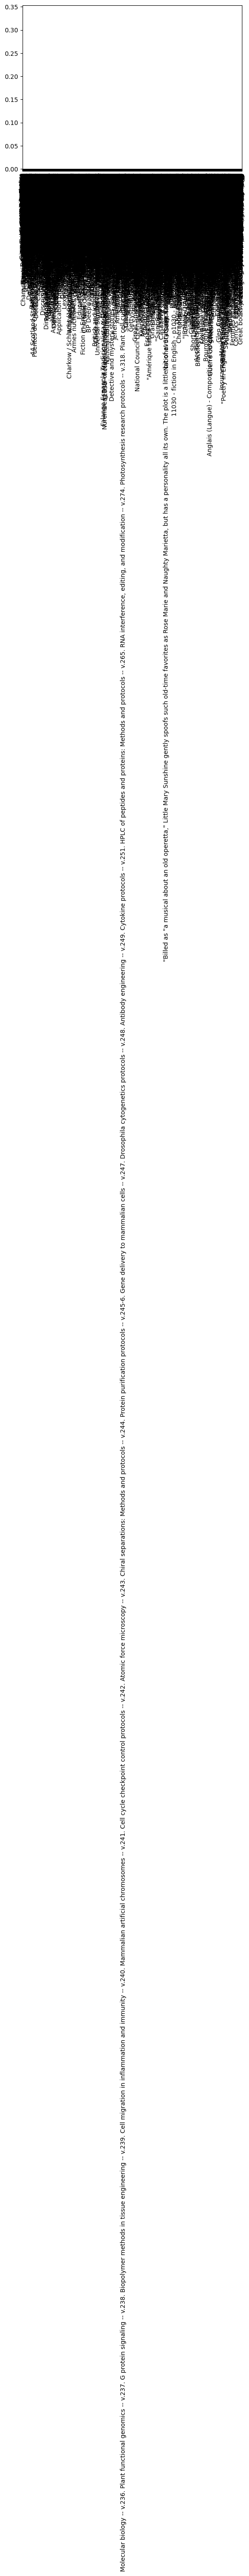

In [ ]:
merged_df["categories"].value_counts(normalize=True).plot(kind="bar")
plt.show()
#HAHAHAHAHA this didn't work out, will leave this here for a laugh,
########################################## Delete before final capstone submission

In [ ]:
merged_df['categories'].nunique()

10883

In [ ]:
# Barplot with the Top 30 Categories
#plt.figure(figsize=(18,9))
# df_top_30['Categorie'].value_counts().sort_values().plot.barh() I can't find this df anymore

#plt.xlim(0,2500)
# plt.title("Top 30 Categories", fontdict={'fontsize':18}, pad = 15)
#plt.xticks(ticks = (range(0,2400,150)))
#plt.xlabel('Frequency',labelpad=10, fontsize=12)

In [ ]:
cut_merged_df.head(1)

,Id,Title,User_id,profileName,review_score,review_summary,review,authors,publishedDate,categories
0,1882931173,Its Only Art If Its Well Hung!,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",4.0,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...,Julie Strain,1996,Comics & Graphic Novels


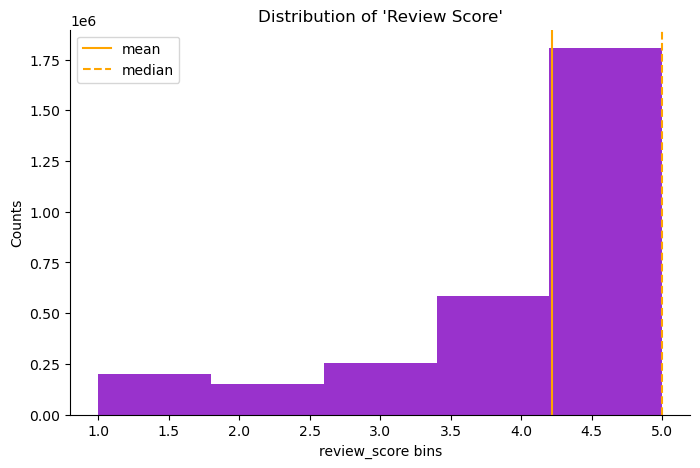

FileNotFoundError: [Errno 2] No such file or directory: 'Downloads/distribution_of_review_score.jpeg'

<Figure size 640x480 with 0 Axes>

In [ ]:
# PLOTING RATING DISTRIBUTION
rate_plot = plt.figure(figsize=(8, 5))

plt.hist(cut_merged_df["review_score"], bins=5, color = 'darkorchid') # mosquito number distribution

plt.axvline(cut_merged_df["review_score"].mean(), color="orange", label="mean")
plt.axvline(cut_merged_df["review_score"].median(), color="orange", linestyle="--", label="median")

plt.title("Distribution of 'Review Score'")
plt.ylabel('Counts')
plt.xlabel("review_score bins")
sns.despine()

plt.legend()
plt.show()
plt.savefig("Downloads/distribution_of_review_score.jpeg")

In [ ]:
cut_merged_df.describe()

,review_score
count,2.999792e+06
mean,4.215263e+00
std,1.203066e+00
min,1.000000e+00
25%,4.000000e+00
50%,5.000000e+00
75%,5.000000e+00
max,5.000000e+00


In [ ]:
#plotting rating per author
cut_merged_df["authors"].value_counts(normalize=True)

J. R. R. Tolkien                   1.428354e-02
Jane Austen                        1.400145e-02
Charles Dickens                    8.152055e-03
John Steinbeck                     6.525860e-03
John Ronald Reuel Tolkien          4.946423e-03
                                       ...     
Storm Jameson                      3.832654e-07
David W. Brady                     3.832654e-07
Robert Blake                       3.832654e-07
Graeme Lorimer', 'Sarah Lorimer    3.832654e-07
Saint Romanos                      3.832654e-07
Name: authors, Length: 127277, dtype: float64

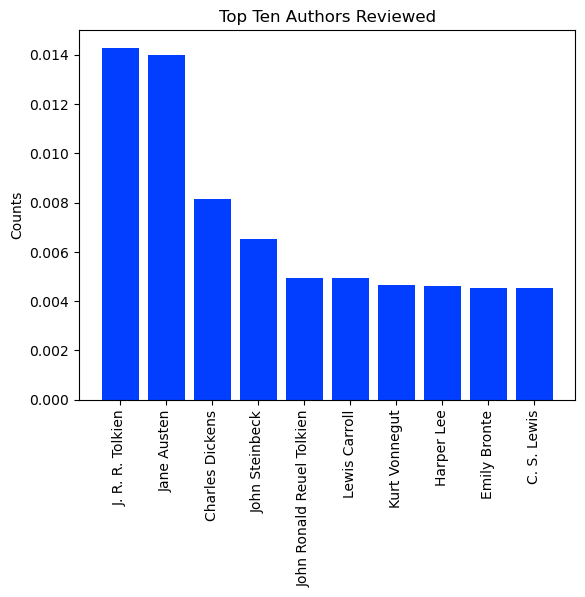

In [ ]:
# Create a Pandas Series and calculate the value counts
value_counts_series = cut_merged_df["authors"].value_counts(normalize=True)

# Get the top ten values
top_ten = value_counts_series.head(10)

# Plot the top ten values
plt.bar(top_ten.index, top_ten.values)
plt.ylabel('Counts')
plt.xticks(rotation=90)

plt.title('Top Ten Authors Reviewed')
plt.show()